In [106]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score


In [107]:
# loading data and Displaying rows
data=pd.read_csv("data/House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [108]:
# Checking null values
print(data.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [109]:
#Have a look at the descriptive statistics of the data
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [110]:
#Getting an overview of the features and their types in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [111]:
print(f"Mean Rent: {data.Rent.mean()}")
print(f"Median Rent: {data.Rent.median()}")
print(f"Highest Rent: {data.Rent.max()}")
print(f"Lowest Rent: {data.Rent.min()}")

Mean Rent: 34993.45132743363
Median Rent: 16000.0
Highest Rent: 3500000
Lowest Rent: 1200


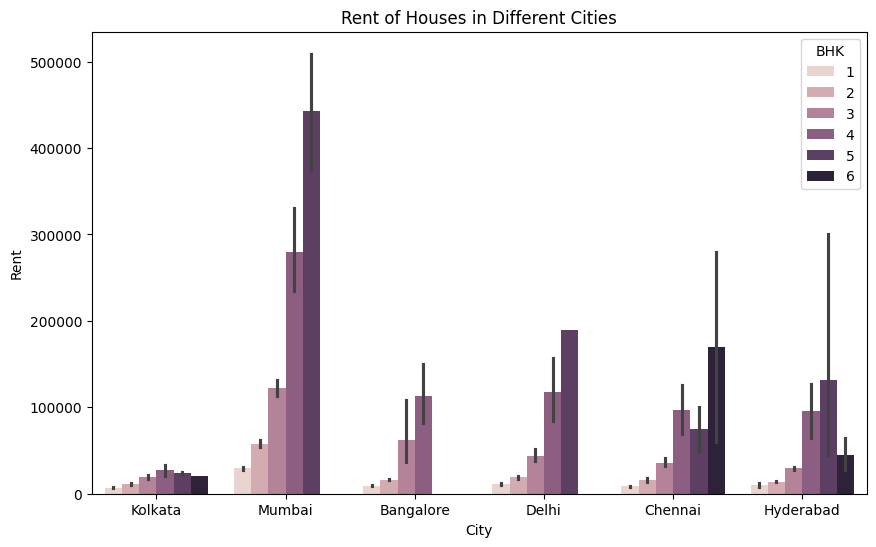

In [112]:
# Looking at the rent of the houses in different cities according to the number of bedrooms, halls, and kitchens
plt.figure(figsize=(10,6))
sns.barplot(data, x='City',y='Rent', hue = 'BHK')
plt.title("Rent of Houses in Different Cities")
plt.show()

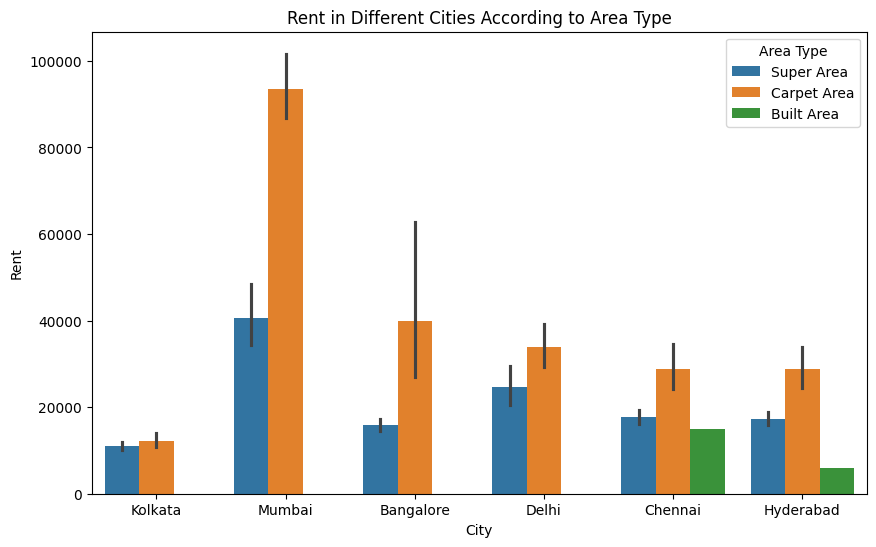

In [113]:
#looking at the rent of the houses in different cities according to the area type
plt.figure(figsize=(10,6))
sns.barplot(data, x='City',y='Rent', hue = 'Area Type')
plt.title("Rent in Different Cities According to Area Type")
plt.show()

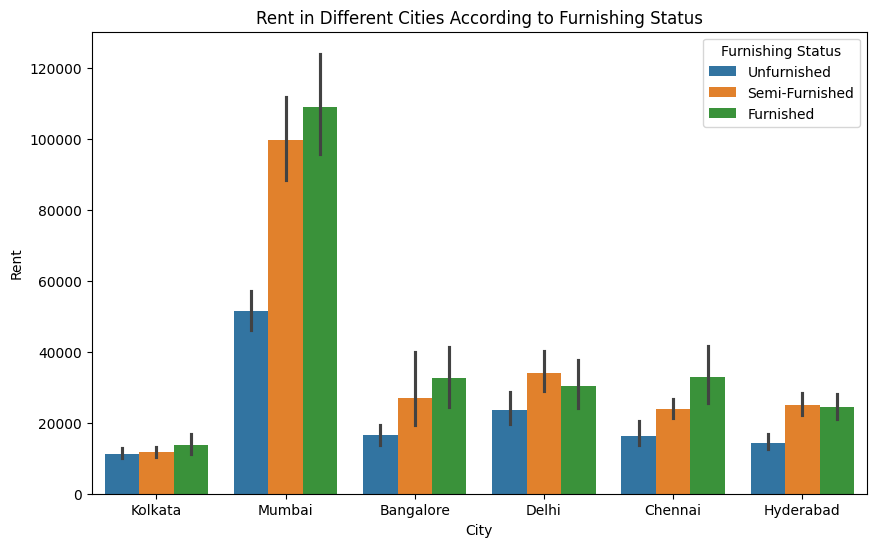

In [114]:
# Looking at the rent of the houses in different cities according to the furnishing status of the house
plt.figure(figsize=(10,6))
sns.barplot(data, x='City',y='Rent', hue = 'Furnishing Status')
plt.title("Rent in Different Cities According to Furnishing Status")
plt.show()

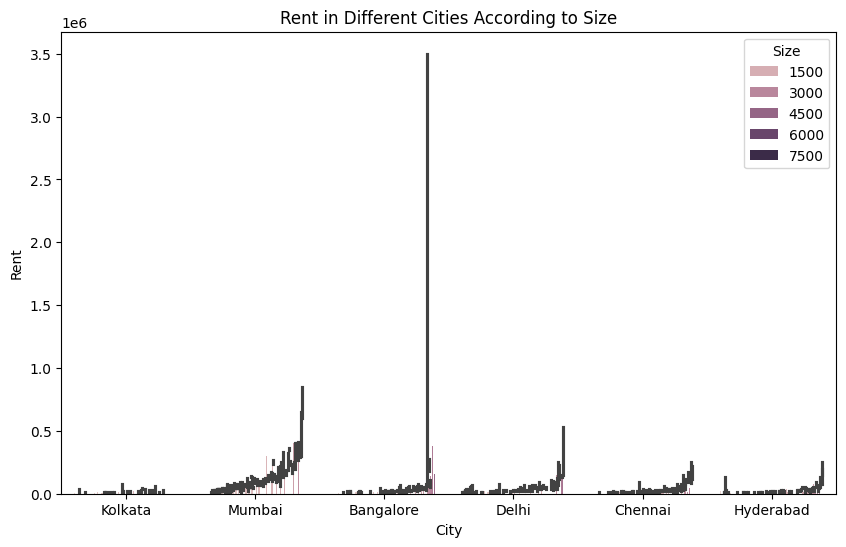

In [115]:
#looking at the rent of the houses in different cities according to the size of the house
plt.figure(figsize=(10,6))
sns.barplot(data, x='City',y='Rent', hue = 'Size')
plt.title("Rent in Different Cities According to Size")
plt.show()

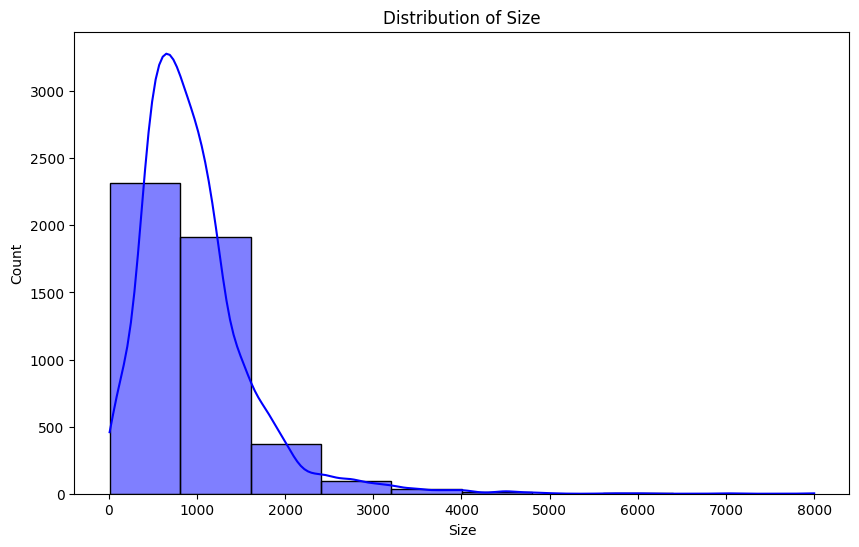

In [116]:
# Visualizing the distribution of the Size
plt.figure(figsize=(10,6))
sns.histplot(data['Size'], kde=True, color='b', bins=10)
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

In [117]:
# Filtering only numerical columns
numerical_features = data.select_dtypes(include=[np.number])

In [118]:
# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

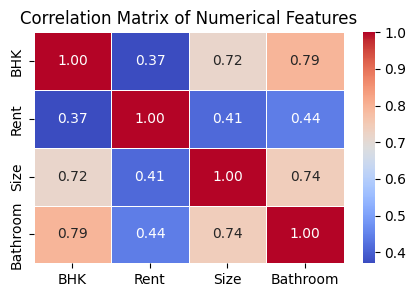

In [119]:
# Visualizing the correlation between numerical features
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

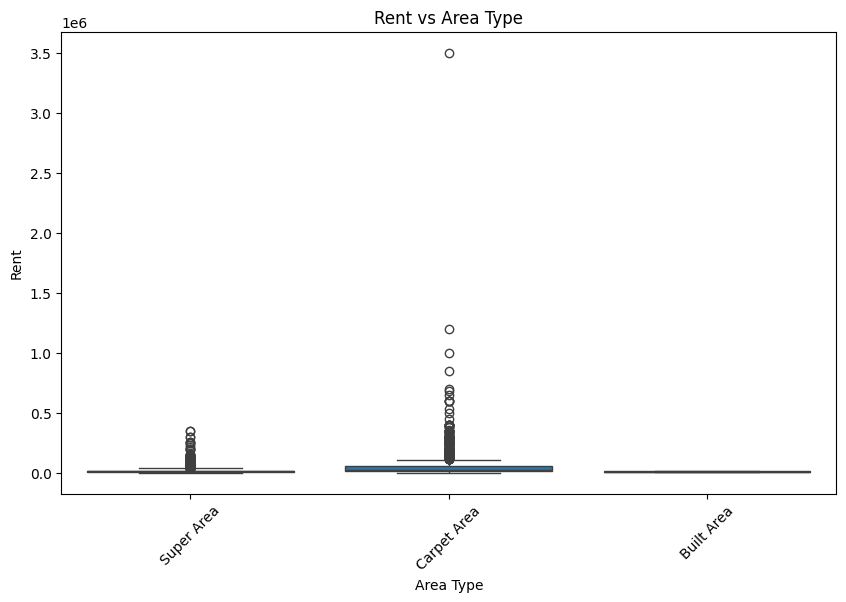

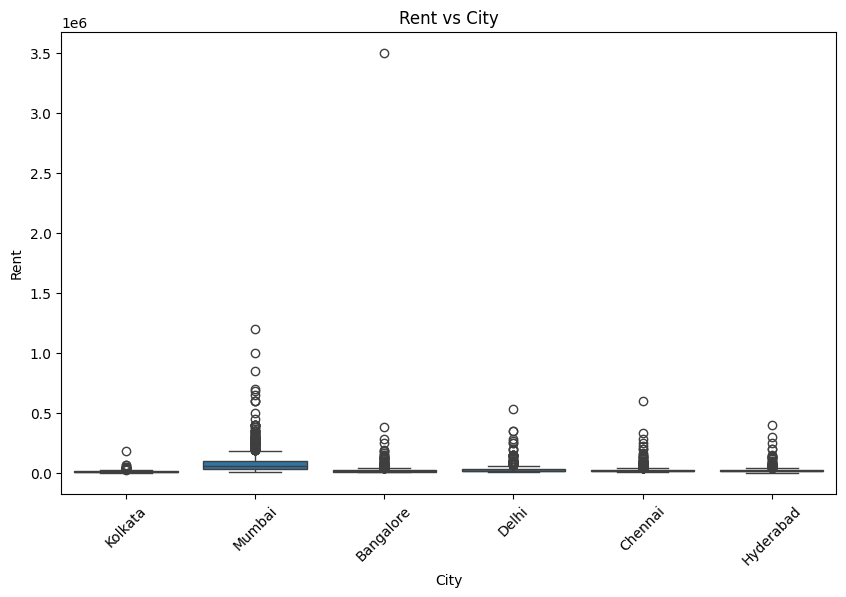

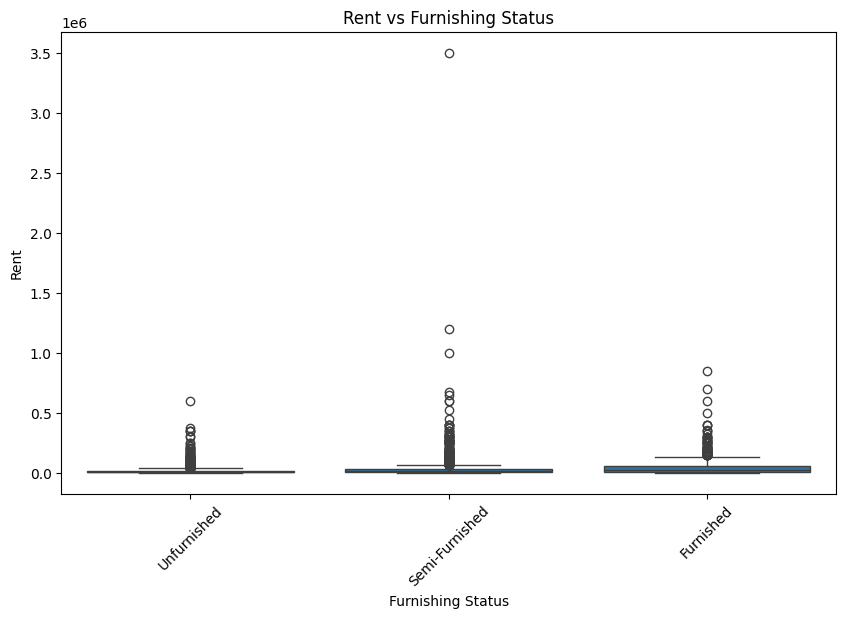

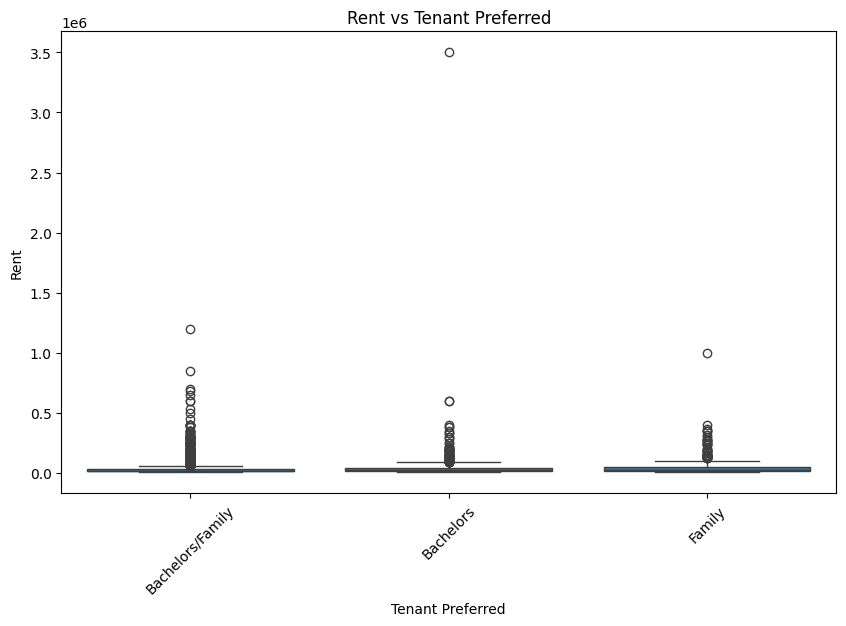

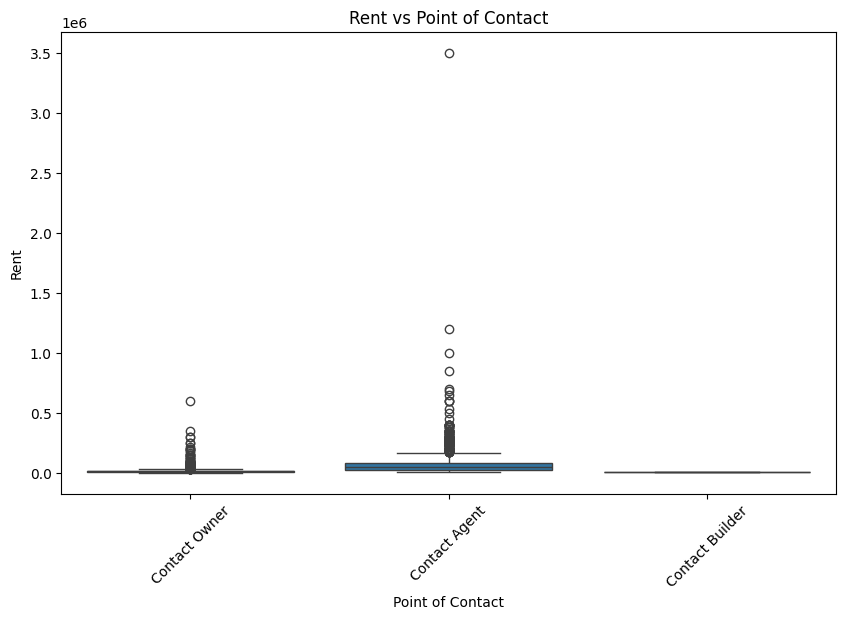

In [120]:
# Visualizing the relationship between categorical features and the target variable
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features=categorical_features.drop(['Posted On','Floor','Area Locality'])
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=feature, y='Rent', data=data)
    plt.title(f'Rent vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

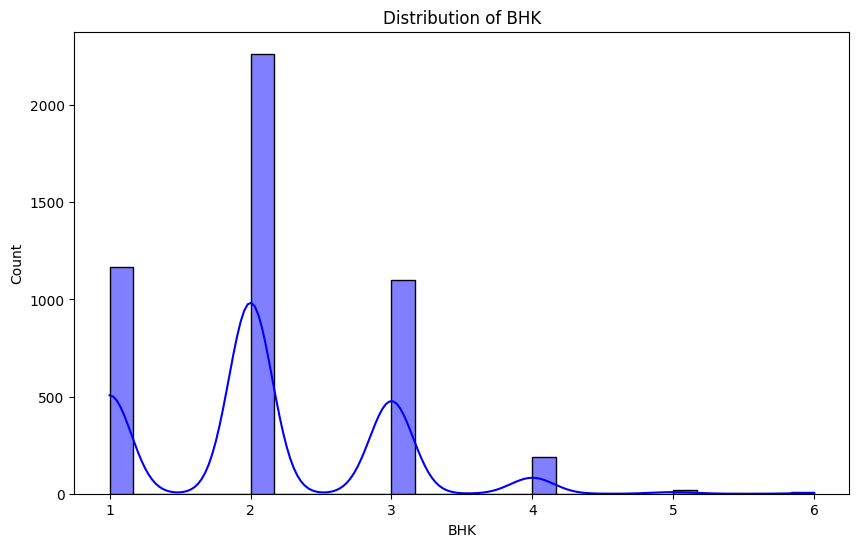

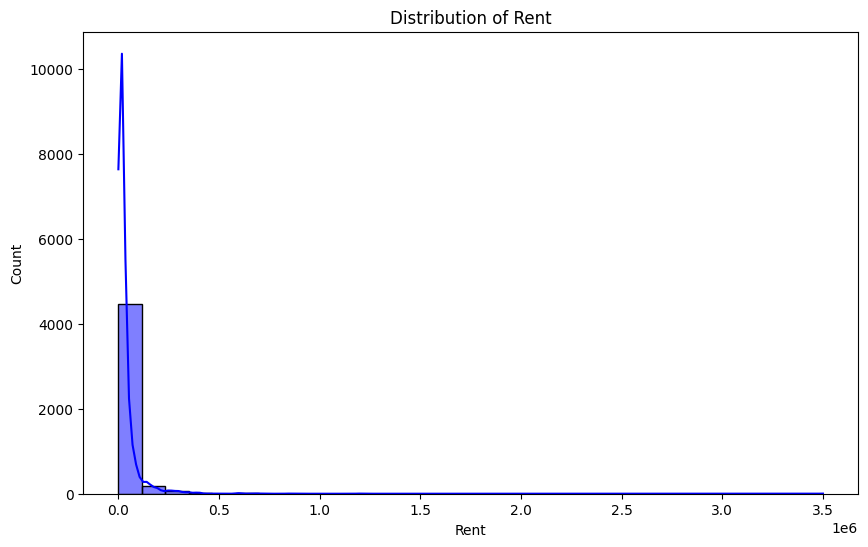

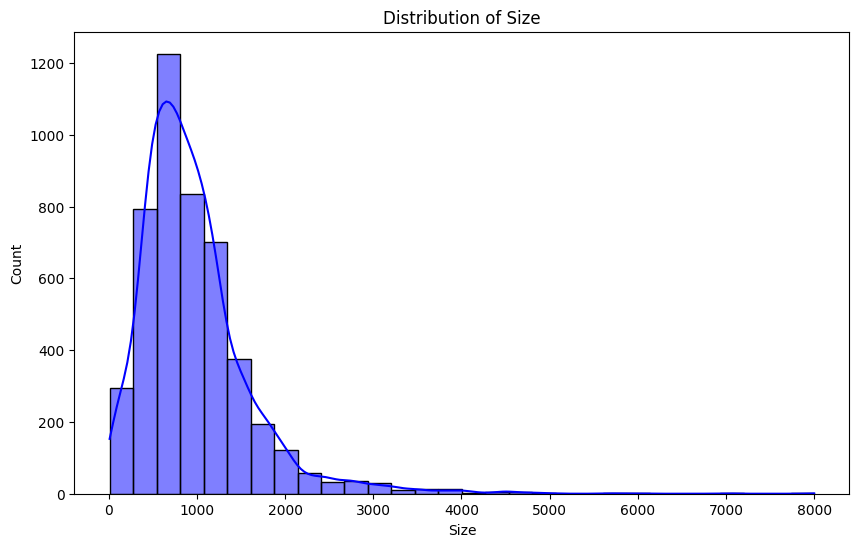

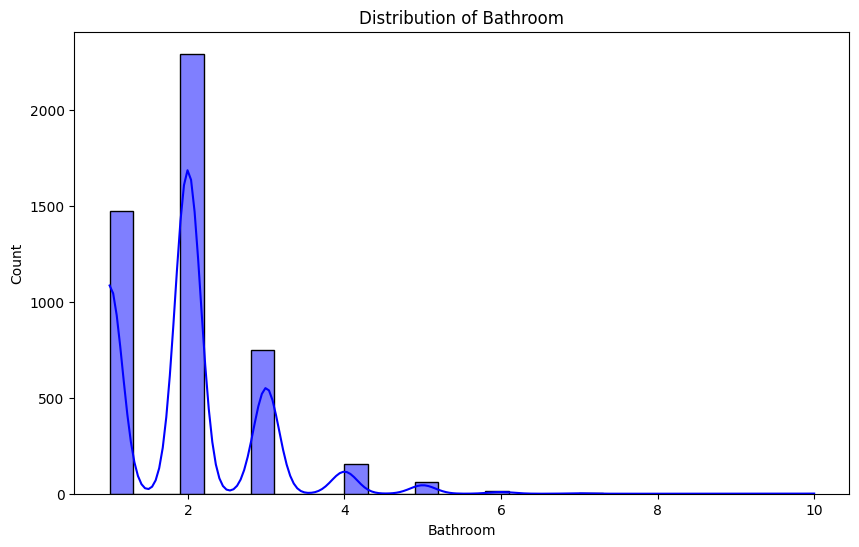

In [121]:
# Visualizing the distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.histplot(data[feature], kde=True, color='b', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

C:\Users\evolv\AppData\Local\Temp\ipykernel_15808\4161914451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Rent', data=data, palette='pastel')


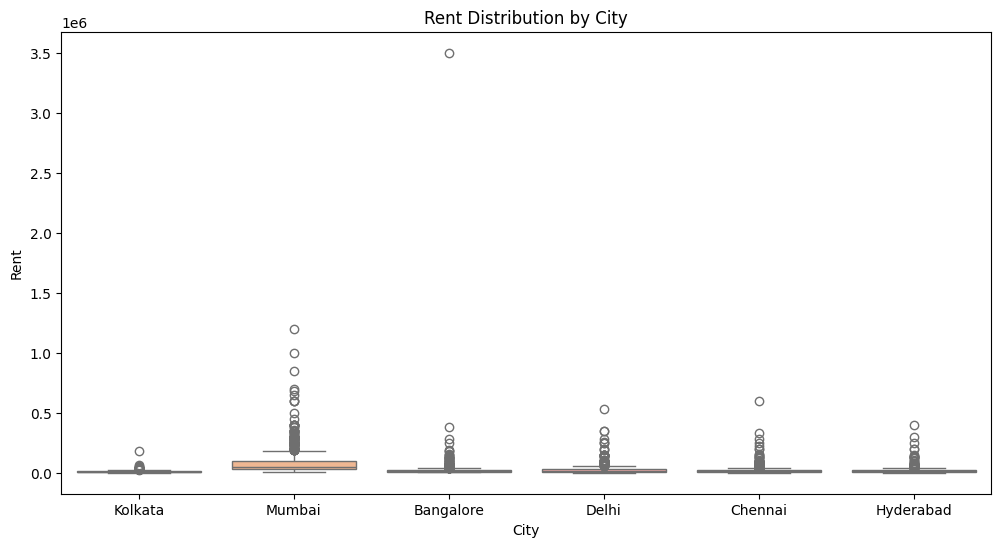

In [122]:
# Visualizing the distribution of categorical variables with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Rent', data=data, palette='pastel')
plt.title('Rent Distribution by City')
plt.xlabel('City')
plt.ylabel('Rent')
plt.show()

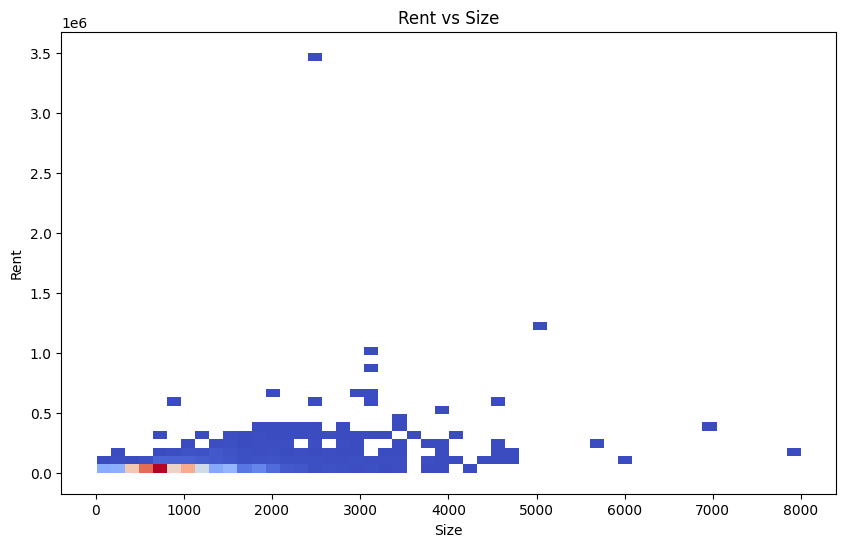

In [123]:
# Visualizing the relationship between two variables with a cross-sectional histogram
plt.figure(figsize=(10, 6))
sns.histplot(x='Size', y='Rent', data=data, bins=50, cmap='coolwarm')
plt.title('Rent vs Size')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

C:\Users\evolv\AppData\Local\Temp\ipykernel_15808\1455750136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BHK', y='Rent', data=data, palette='pastel')


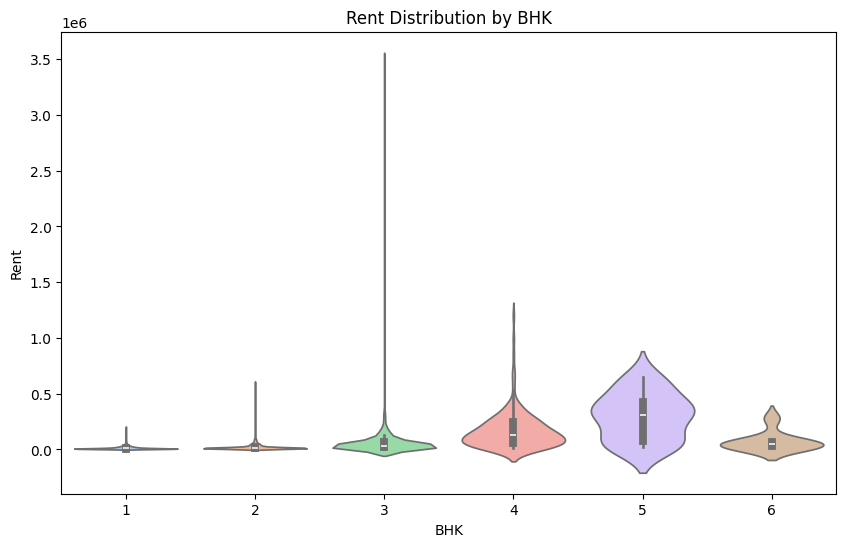

In [124]:
# Visualizing the density of a variable with a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='BHK', y='Rent', data=data, palette='pastel')
plt.title('Rent Distribution by BHK')
plt.xlabel('BHK')
plt.ylabel('Rent')
plt.show()

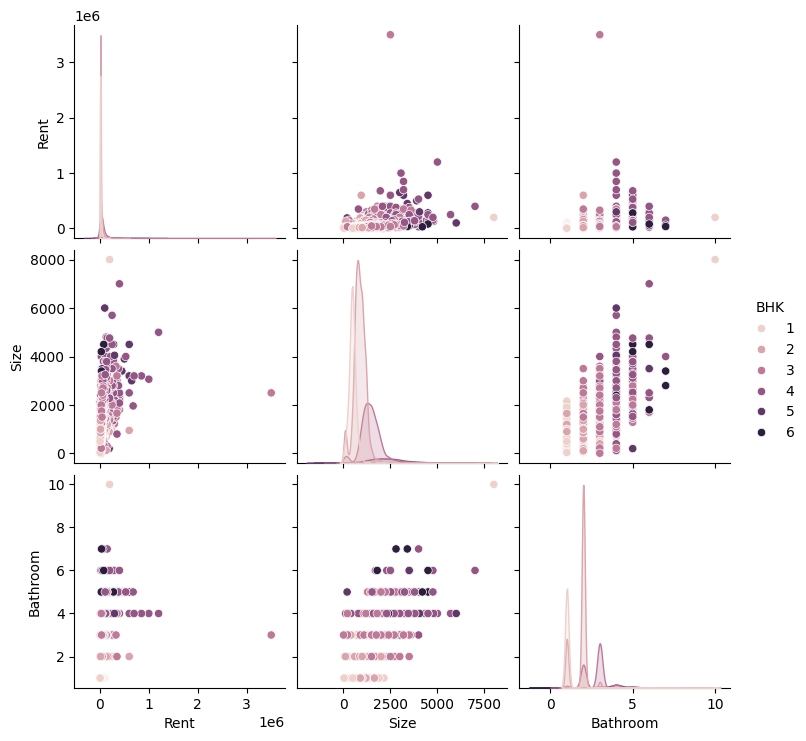

In [125]:
data_numerical=data[numerical_features]
sns.pairplot(data_numerical,hue='BHK', height=2.5)

In [126]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

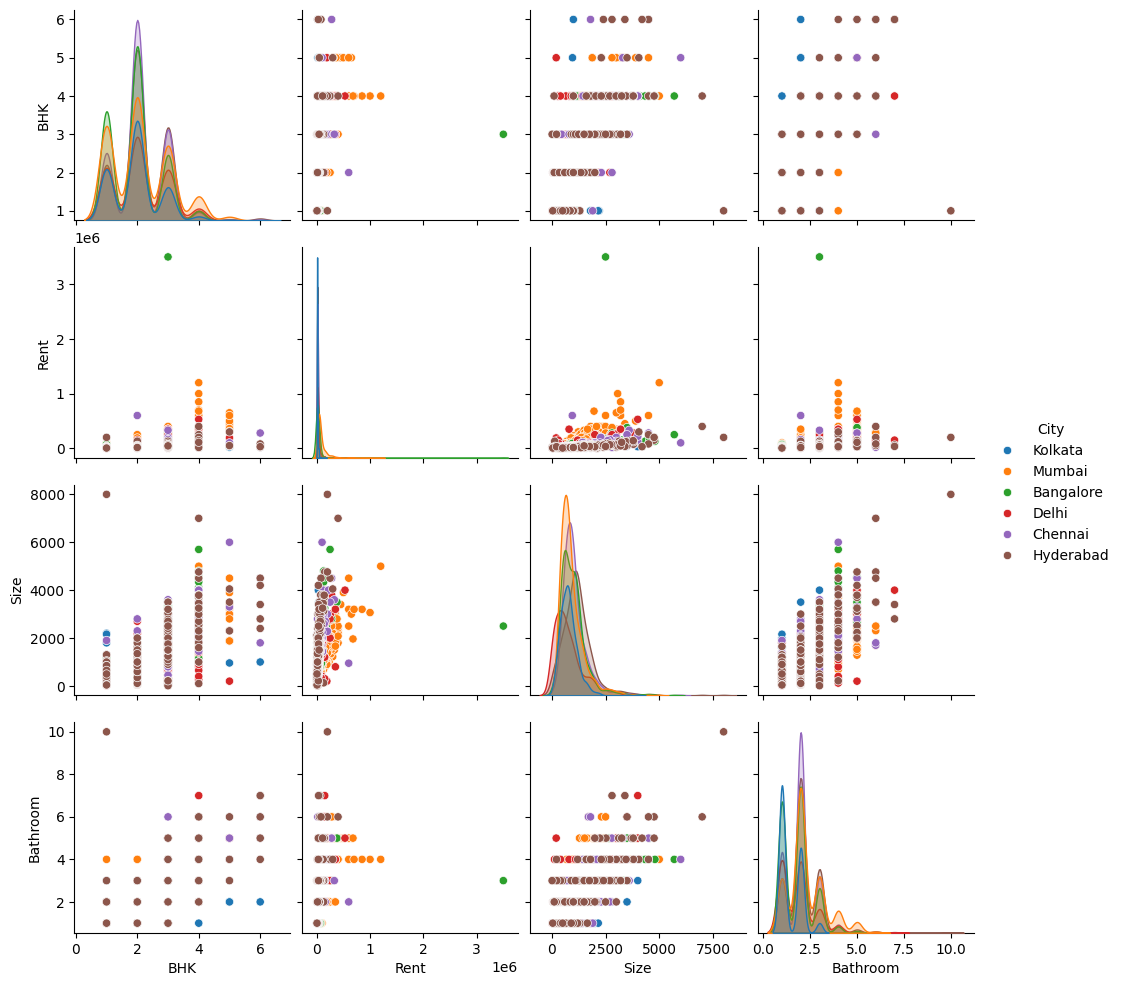

In [127]:
data_numerical=data[numerical_features]
new_Data=data.drop(['Posted On','Area Locality'],axis=1)
sns.pairplot(new_Data, hue='City')

In [128]:
#House Rent Prediction Model

#converting all the categorical features into numerical features that we need to train a house rent prediction model


data["Area Type"] = data["Area Type"].map({"Super Area": 1, 
                                           "Carpet Area": 2, 
                                           "Built Area": 3})
data["City"] = data["City"].map({"Mumbai": 0, "Chennai": 1, 
                                 "Bangalore": 2, "Hyderabad": 3, 
                                 "Delhi": 4, "Kolkata": 5})
data["Furnishing Status"] = data["Furnishing Status"].map({"Unfurnished": 0, 
                                                           "Semi-Furnished": 1, 
                                                           "Furnished": 2})
data["Tenant Preferred"] = data["Tenant Preferred"].map({"Bachelors/Family": 2, 
                                                         "Bachelors": 1,
                                                         "Family": 3})
data.head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,5,0,2,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",5,1,2,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,5,1,2,1,Contact Owner


In [129]:
#splitting data
from sklearn.model_selection import train_test_split
X = data[["BHK", "Size", "Area Type", "City", 
                   "Furnishing Status", "Tenant Preferred", 
                   "Bathroom"]]
y = data[["Rent"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [130]:
# Train Data Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [131]:

# Show the results
print("Train Data Coefficients:", model.coef_)
print("Train Data Intercept:", model.intercept_)

Train Data Coefficients: [[ 4070.49873822    24.80418936 18985.90904829 -7408.14525437
   5285.93433932 -3756.17767797 16562.4816216 ]]
Train Data Intercept: [-39167.32225985]


In [132]:
# Make predictions
y_pred=model.predict(x_test)


In [133]:
rmse = mean_squared_error(y_test['Rent'], y_pred, squared=False)
r2 = r2_score(y_test['Rent'], y_pred)

# Display the results
print(f"Model RMSE: {rmse}, Model R2 Score: {r2}")


Model RMSE: 59859.12870460175, Model R2 Score: 0.39659136803724815


In [135]:
model.score(x_test,y_test)

0.39659136803724815